# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS (2).csv', encoding="windows-1252")

In [3]:
kill.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [7]:
kill.shape

(2535, 14)

In [10]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [11]:
kill.dropna(inplace=True)

In [12]:
kill.shape

(2254, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [13]:
kill.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [15]:
kill["manner_of_death"].unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

<AxesSubplot:xlabel='gender', ylabel='age'>

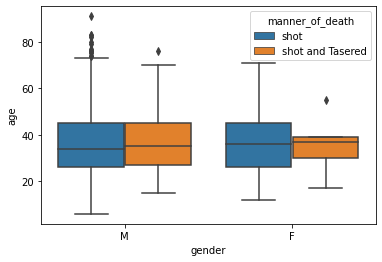

In [20]:
# with seaborn
sns.boxplot(x = "gender", y = "age", hue="manner_of_death", data=kill)

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

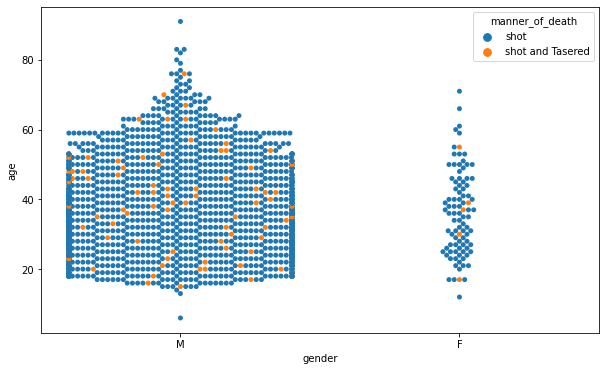

In [24]:
# with seaborn
plt.figure(figsize=(10,6))
sns.swarmplot(x = "gender", y="age", data=kill, hue="manner_of_death");

## 2: Plot 12 most dangerous cities

In [42]:
dang = kill.city.value_counts().head(12)
dang

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
San Antonio     15
Miami           15
St. Louis       14
Indianapolis    14
Bakersfield     13
Name: city, dtype: int64

In [44]:
dang.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'San Antonio', 'Miami', 'St. Louis', 'Indianapolis',
       'Bakersfield'],
      dtype='object')

In [46]:
dang.values

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13], dtype=int64)

In [86]:
new = pd.DataFrame(dang)
new.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'San Antonio', 'Miami', 'St. Louis', 'Indianapolis',
       'Bakersfield'],
      dtype='object')

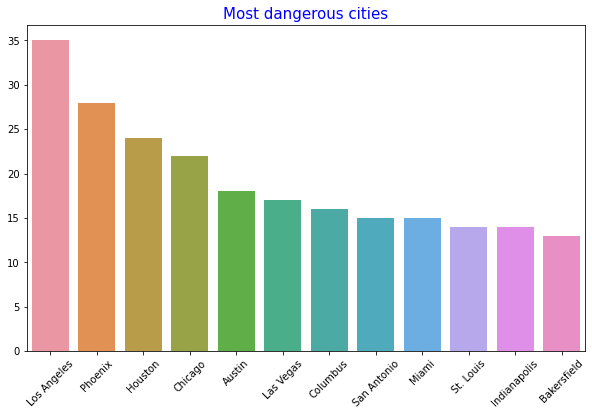

In [113]:
plt.figure(figsize=(10,6))
plt.title("Most dangerous cities", color="blue", fontsize = 15)
sns.barplot(x = dang.index, y=dang.values, data=kill)
dang_pos = range(len(dang.index))
plt.xticks(dang_pos, dang.index, rotation=45);

In [90]:
dang.index & kill.city

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'San Antonio', 'Miami', 'St. Louis', 'Indianapolis',
       'Bakersfield'],
      dtype='object')

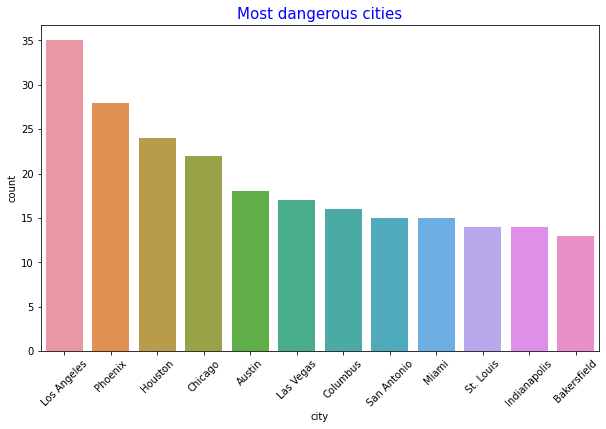

In [103]:
plt.figure(figsize=(10,6))
plt.title("Most dangerous cities", color="blue", fontsize = 15)
sns.countplot(x = "city", data = kill, order = kill.city.value_counts().iloc[:12].index)
dang_pos = range(len(dang.index))
plt.xticks(dang_pos, dang.index, rotation=45);

## 3: Plot 20 most dangerous states

In [104]:
kill.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
276,362,Jason Lee Evans,12/04/15,shot,gun,32.0,M,W,Salemburg,NC,True,attack,Car,False


In [108]:
dang_city = kill.state.value_counts().head(20)
dang_city

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
IL     56
TN     56
WA     51
LA     47
AL     45
PA     45
VA     43
NY     43
WI     42
NM     41
Name: state, dtype: int64

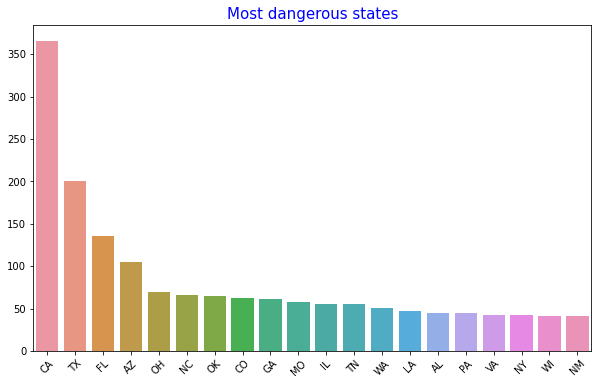

In [114]:
plt.figure(figsize=(10,6))
plt.title("Most dangerous states", color="blue", fontsize = 15)
sns.barplot(x=dang_city.index, y=dang_city.values, data=kill)
dang.city = range(len(dang_city.index))
plt.xticks(dang.city, dang_city.index, rotation=45);

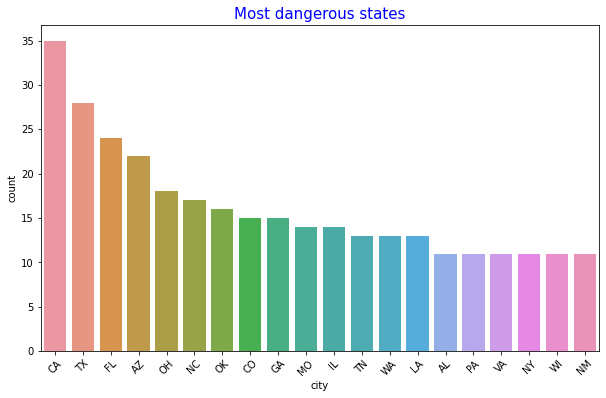

In [117]:
plt.figure(figsize=(10,6))
plt.title("Most dangerous states", color="blue", fontsize = 15)
sns.countplot(x="city", data=kill, order=kill.city.value_counts().iloc[:20].index)
dang.city = range(len(dang_city.index))
plt.xticks(dang.city, dang_city.index, rotation=45);

## 4: Plot Having mental ilness or not for killed people

In [123]:
illness = kill["signs_of_mental_illness"].value_counts()
illness

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

In [129]:
illness.values

array([1681,  573], dtype=int64)

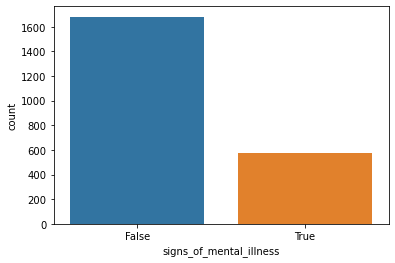

In [134]:
sns.countplot(x = "signs_of_mental_illness", data = kill);

## 5: Plot number of Threat Types

In [137]:
kill["threat_level"].value_counts()

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

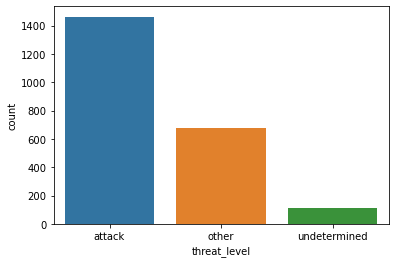

In [138]:
sns.countplot(x="threat_level", data=kill);

## 6: Plot number of Flee Types

In [139]:
kill.flee.value_counts()

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

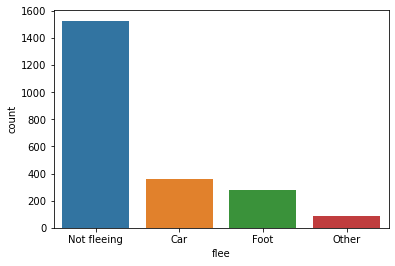

In [141]:
sns.countplot(x="flee", data=kill);